In [38]:
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib inline

#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
#plt.rcParams['figure.figsize'] = (15, 7)

# read zone lookup table
zones = 'taxi_zone_lookup.csv'
zonesLookup = pd.read_csv(zones)

# read taxi data for Jan 2018
data='yellow_tripdata_2018-01.csv'
data_jan_ = pd.read_csv(data,header=0,
        usecols=["tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count","trip_distance","PULocationID","DOLocationID","payment_type","fare_amount","total_amount"],
        parse_dates=["tpep_pickup_datetime","tpep_dropoff_datetime"])


# Merge the data with taxi zones table (taking only data we need for the QR#2)
data_jan= data_jan_.merge(zonesLookup[['LocationID','Borough']],how='inner', left_on='PULocationID', right_on='LocationID')


In [39]:
data_jan_int = data_jan.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
data_jan_float = data_jan.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
data_jan_obj = data_jan.select_dtypes(include=['object']).astype('category')


In [40]:
data_jan_optimized = data_jan.copy()

data_jan_optimized[data_jan_int.columns] = data_jan_int
data_jan_optimized[data_jan_float.columns] = data_jan_float
data_jan_optimized[data_jan_obj.columns] = data_jan_obj

In [41]:
data_jan_optimized = data_jan_optimized[data_jan_optimized.passenger_count!=0]
data_jan_optimized = data_jan_optimized[data_jan_optimized.trip_distance!=0]

In [42]:
# Removing the old dataframes
del data_jan_
del data_jan

In [96]:
import datetime

rq3_jan = pd.DataFrame(columns=['Duration','Borough'])
rq3_jan['Borough'] = data_jan_optimized['Borough']
start = data_jan_optimized['tpep_pickup_datetime']
#end   = data_jan_optimized.at[1,'tpep_dropoff_datetime']
end = data_jan_optimized['tpep_dropoff_datetime']

delta = end-start
rq3_jan['Duration'] = delta.dt.seconds/60

In [97]:
rq3_jan.describe()

,Duration
count,8.646161e+06
mean,1.575335e+01
std,6.047627e+01
min,0.000000e+00
25%,6.300000e+00
50%,1.041667e+01
75%,1.690000e+01
max,1.439983e+03


In [133]:
# We noticed some entries with duration = 0, so we removed them
# there are few values with weird high number, so we restriced our vizulization to max of 80 minutes, in order to get a clear plot
rq3_jan=rq3_jan[rq3_jan.Duration!=0]
rq3_jan=rq3_jan[rq3_jan.Duration<=60]

In [109]:
rq3_jan.describe()

,Duration
count,8.630486e+06
mean,1.325137e+01
std,1.252679e+01
min,1.666667e-02
25%,6.300000e+00
50%,1.040000e+01
75%,1.685000e+01
max,9.999500e+02


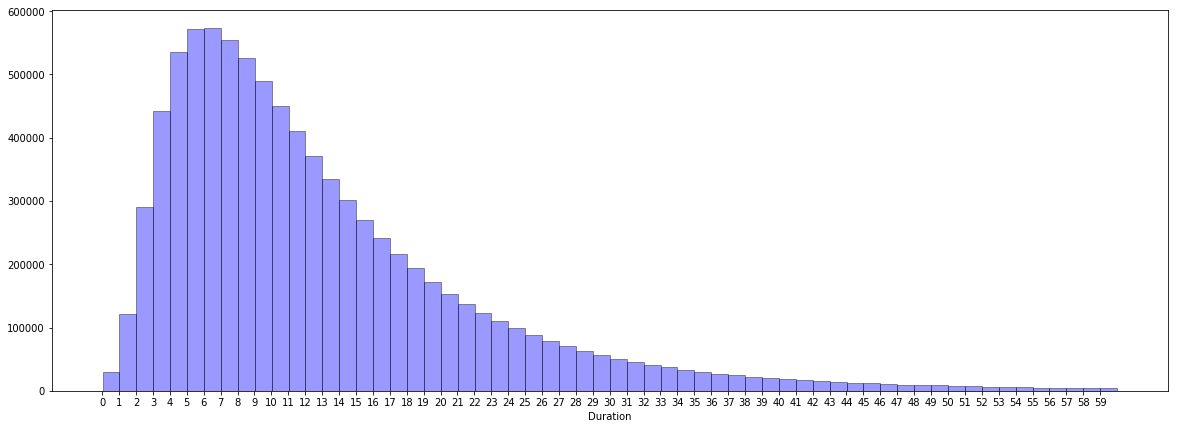

In [136]:
import numpy as np
import scipy.stats as stats
'''hmean = np.mean(rq3_jan['Duration'])
hstd = np.std(rq3_jan['Duration'])
pdf = stats.norm.pdf(rq3_jan['Duration'], hmean, hstd)
plt.plot(rq3_jan['Duration'], pdf)
'''
#fig, ax = plt.subplots(figsize=(15,7))
#rq3_jan['Duration'].plot(ax=ax,kind="line")
fig, ax = plt.subplots(figsize=(20,7))
# Modify the x-axis to show numbers between 0-23
plt.xticks(list(range(0,60,1)))
import seaborn as sns
from scipy import stats
sns.distplot(rq3_jan['Duration'],hist=True, kde=False, 
             bins=int(180/3), color = 'blue',
             hist_kws={'edgecolor':'black'});


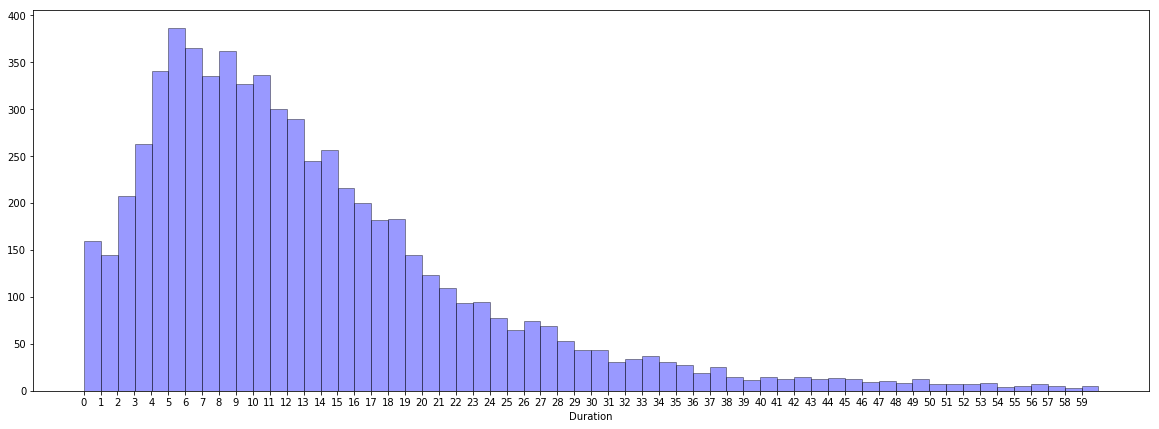

In [161]:
rq3_jan_b = rq3_jan.loc[rq3_jan['Borough']=='Bronx']
fig, ax = plt.subplots(figsize=(20,7))
plt.xticks(list(range(0,60,1)))
sns.distplot(rq3_jan_b['Duration'],hist=True, kde=False, 
             bins=int(180/3), color = 'blue',
             hist_kws={'edgecolor':'black'});


In [ ]:
#fig, ax = plt.subplots(figsize=(8,6))
#rq3_jan.groupby('Borough').plot(kind='kde', ax=ax)
for label, df in rq3_jan.groupby('Borough'):
    df.Duration.plot(kind="kde", ax=ax, label=label)
plt.legend()

In [ ]:
'''
    TODO: We need to concat all months data and perform the above operations
'''